In [1]:
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import pandas as pd

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
questions = json.load(open('autocast_questions.json', encoding="utf8")) # Download from GitHub
qid_to_question = {q['id']: q for q in questions}

In [3]:
resolved = {
    'id': [],
    'question': [],
    'qtype': [],
    'choices': [],
    'answer': [],
    'close_time': [],
    'tags': []
    
}
cnt = 0
for q in questions:
    if q['status'] == 'Resolved':
        cnt += 1
        for key in resolved:
            resolved[key].append(q[key])

data = pd.DataFrame(resolved)

In [4]:
data

,id,question,qtype,choices,answer,close_time,tags
0,G1,What will the end-of-day closing value for the...,mc,"[Less than 6.30, Between 6.30 and 6.35, inclus...",D,2016-01-01 17:00:01+00:00,"[Finance, Economic Indicators]"
1,G2,How many seats will the Justice and Developmen...,mc,"[A majority, A plurality, Not a plurality]",A,2015-11-01 22:00:20+00:00,"[Elections and Referenda, Non-US Politics]"
2,G4,Will there be an initial public offering on ei...,t/f,"[yes, no]",yes,2015-11-30 14:00:15+00:00,[Finance]
3,G5,Will the Export-Import Bank of the United Stat...,t/f,"[yes, no]",yes,2015-12-04 14:00:25+00:00,"[Economic Policy, US Politics, US Policy]"
4,G6,Will a trilateral meeting take place between C...,t/f,"[yes, no]",no,2015-12-31 23:00:11+00:00,[Foreign Policy]
...,...,...,...,...,...,...,...
3743,M10827,Will the 7-day moving average of current confi...,t/f,"[yes, no]",no,2022-05-20 16:00:00+00:00,"[Novel Coronavirus (Covid-19), Tournament -- R..."
3744,M10845,Will Russia officially declare war on Ukraine ...,t/f,"[yes, no]",no,2022-05-08 20:59:00+00:00,"[Short-fuse, Geopolitics – Armed Conflict, Ukr..."
3745,M10858,Will the Metaculus question about Russian troo...,t/f,"[yes, no]",yes,2022-05-31 15:54:00+00:00,"[Metaculus Itself, Geopolitics – Armed Conflic..."
3746,M10956,[Short Fuse] How much money will be awarded to...,num,"{'max': 100000000, 'min': -100000000, 'deriv_r...",0.54175,2022-05-31 04:00:00+00:00,"[Short-fuse, Social issues – Crime and Violence]"


In [5]:
data['question'][3746]

'[Short Fuse] How much money will be awarded to Johnny Depp in his defamation suit against his ex-wife Amber Heard?'

In [5]:
resolved.keys()

dict_keys(['id', 'question', 'qtype', 'choices', 'answer', 'close_time', 'tags'])

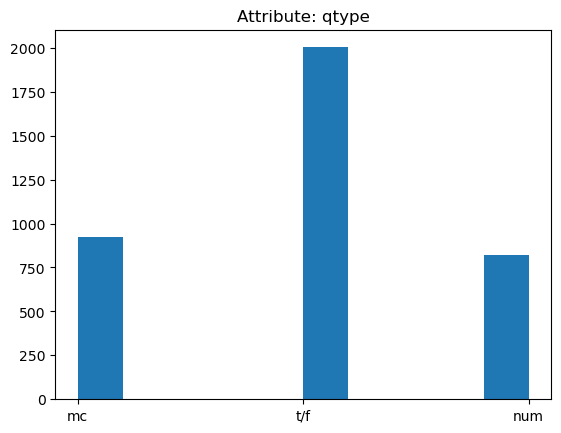

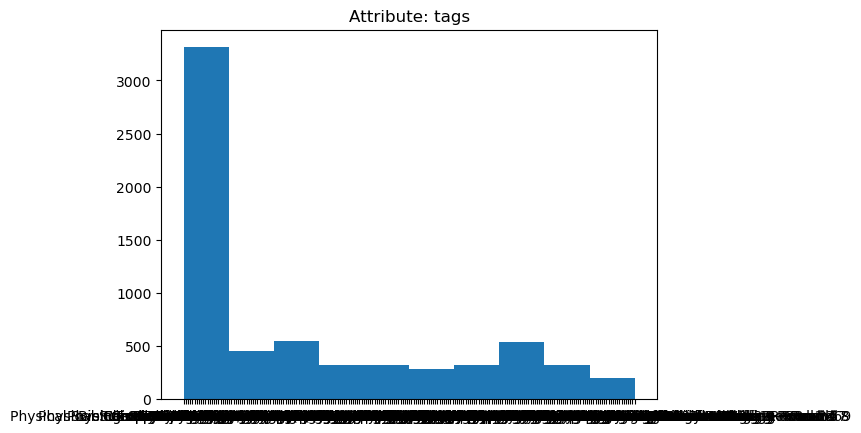

In [6]:
 for key in ['qtype', 'tags']:
    dom = []
    for i in range(len(data[key])):
        if not type(data[key][i]) == list:
            dom.append(data[key][i])
        else:
            for element in data[key][i]:
                dom.append(element)
    plt.hist(dom)
    plt.title(f'Attribute: {key}')
    plt.show()

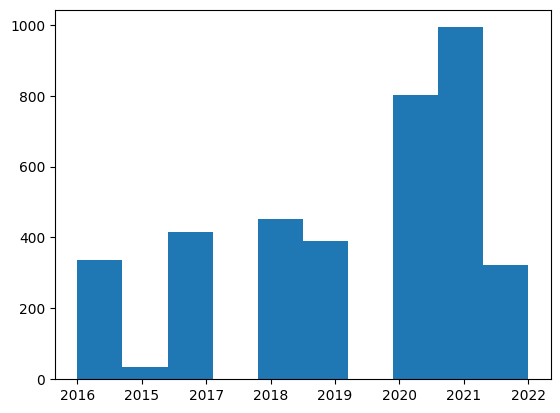

In [6]:
years = []
for i in range(len(data['close_time'])):
    years.append(data['close_time'][i][:4])
plt.hist(years)
plt.show()


In [7]:
for q in questions:
    print(q)
    break

{'question': 'What will the end-of-day closing value for the dollar against the renminbi be on 1 January 2016?', 'id': 'G1', 'background': "Outcome will be determined by the end-of-day closing value reported by Bloomberg, at http://www.bloomberg.com/quote/usdcny:cur. For historical trends, see http://www.bloomberg.com/quote/usdcny:cur/chart. For more information on China's economy see http://www.theworldin.com/article/10492.", 'publish_time': '2015-09-01 13:49:29.860000+00:00', 'close_time': '2016-01-01 17:00:01+00:00', 'tags': ['Finance', 'Economic Indicators'], 'source_links': ['http://ftalphaville.ft.com/2015/08/17/2137329/what-are-chinese-capital-controls-really-part-2/', 'http://www.investmentweek.co.uk/investment-week/analysis/2427669/why-investors-need-to-remain-mindful-of-a-more-flexible-renminbi-regime', 'http://www.bbc.com/news/business-34825542', 'https://larswericson.wordpress.com/2015/12/10/a-super-long-picky-post/', 'http://www.federalreserve.gov/releases/h10/hist/dat00_c